# Student Retention Prediction Using Machine Learning

## Objective
The objective of this project is to predict whether a student will drop out using machine learning techniques.

We use a Random Forest Classifier to identify students at risk based on academic and socio-economic factors.


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings("ignore")


## 1. Data Loading

In this section, we load the dataset and examine its structure.

The dataset contains student academic, demographic, and socio-economic information.
The target variable indicates whether a student dropped out (1) or not (0).


In [27]:
df = pd.read_csv("dataset.csv") 
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## 2. Data Understanding

In this section, we explore:

- Number of rows and columns
- Data types of each feature
- Presence of missing values
- Distribution of the target variable


In [28]:
df.shape


(4424, 35)

In [29]:
df.columns


Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [31]:
df.isnull().sum().sum()

np.int64(0)

## 3. Target Variable Analysis

The target variable indicates whether a student dropped out or not.

We will:
- Check class distribution
- Visualize class imbalance


In [32]:
df["Target"].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [33]:
df["Target"] = df["Target"].apply(lambda x: 1 if x == "Dropout" else 0)
df["Target"].value_counts()

Target
0    3003
1    1421
Name: count, dtype: int64

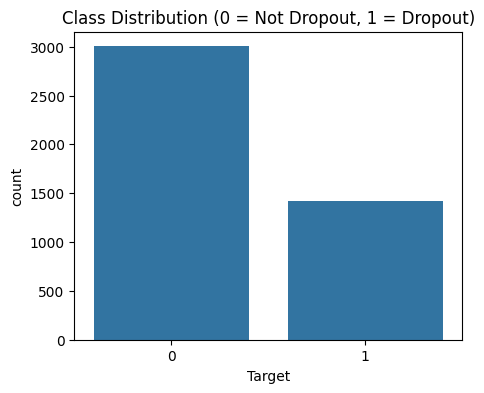

In [34]:
plt.figure(figsize=(5,4))
sns.countplot(x="Target", data=df)
plt.title("Class Distribution (0 = Not Dropout, 1 = Dropout)")
plt.show()

## 4. Correlation Analysis

Correlation analysis helps us understand how features relate to each other and to the target variable.

Strong correlations between academic performance and dropout are expected.


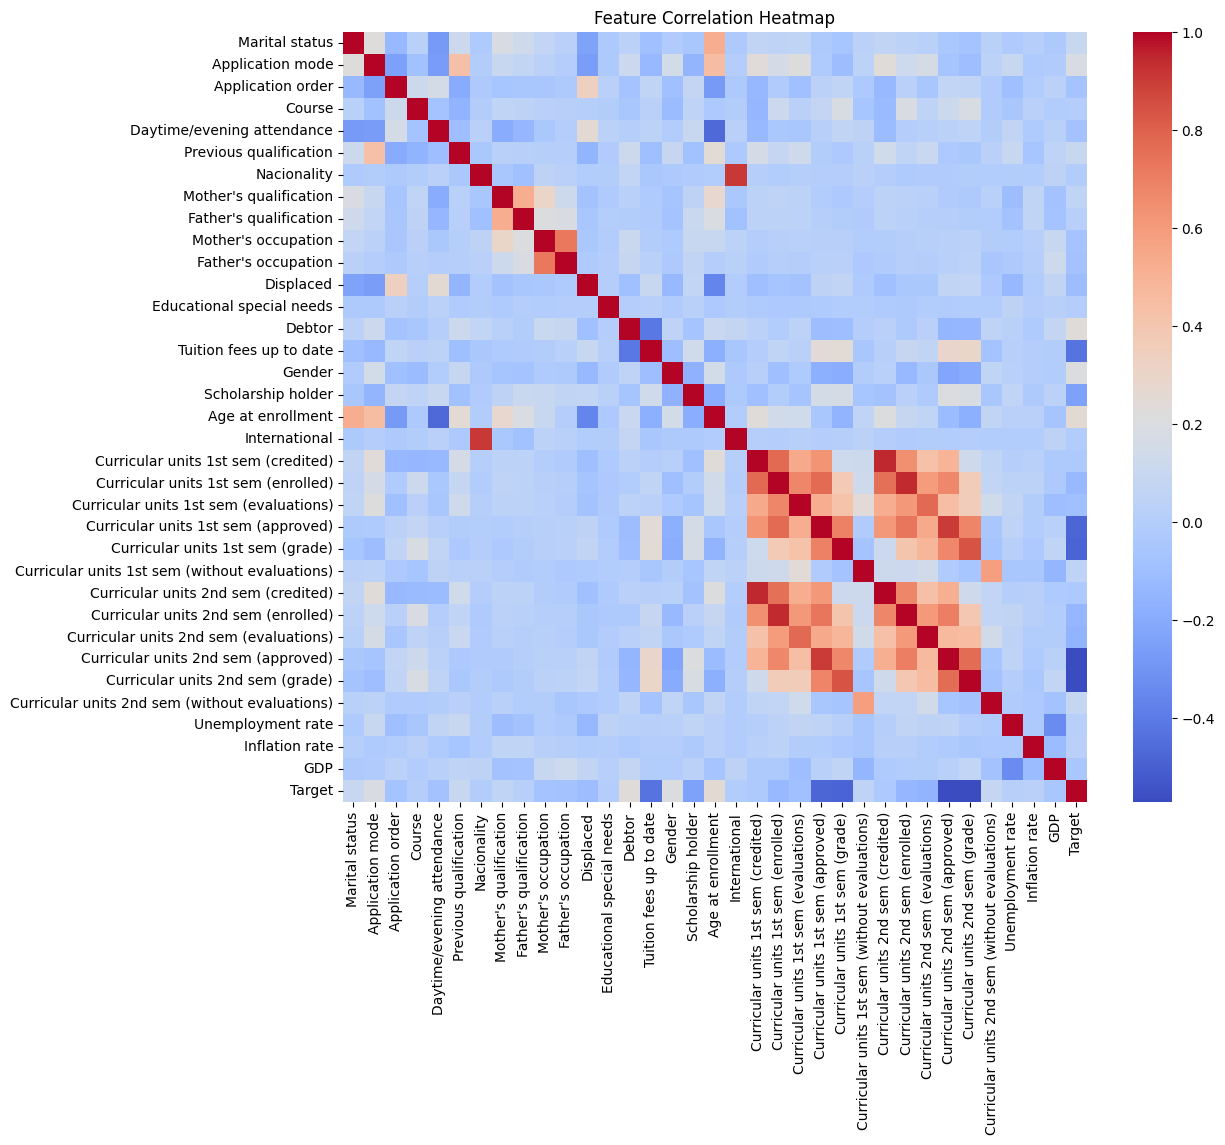

In [35]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [36]:
df.corr()["Target"].sort_values(ascending=False)

Target                                            1.000000
Age at enrollment                                 0.254215
Debtor                                            0.229407
Gender                                            0.203983
Application mode                                  0.188908
Marital status                                    0.093712
Previous qualification                            0.091590
Curricular units 2nd sem (without evaluations)    0.079901
Mother's qualification                            0.059499
Curricular units 1st sem (without evaluations)    0.054230
Inflation rate                                    0.027826
Father's qualification                            0.016267
Unemployment rate                                 0.012980
Educational special needs                         0.002806
Course                                           -0.000083
Nacionality                                      -0.001571
International                                    -0.0103

## 5. Feature Comparison with Dropout

In this section, we compare important academic and financial features 
between dropout and non-dropout students.

This helps us understand which factors strongly influence student retention.


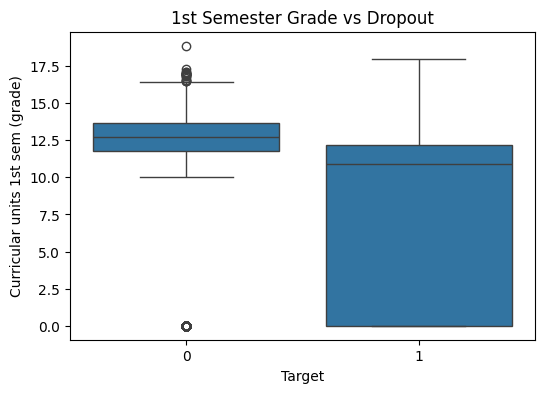

In [37]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Target", y="Curricular units 1st sem (grade)", data=df)
plt.title("1st Semester Grade vs Dropout")
plt.show()


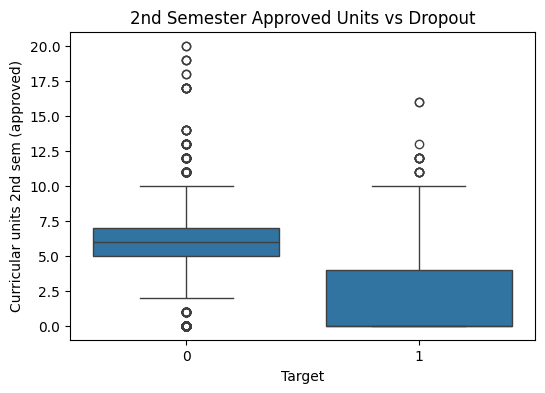

In [38]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Target", y="Curricular units 2nd sem (approved)", data=df)
plt.title("2nd Semester Approved Units vs Dropout")
plt.show()


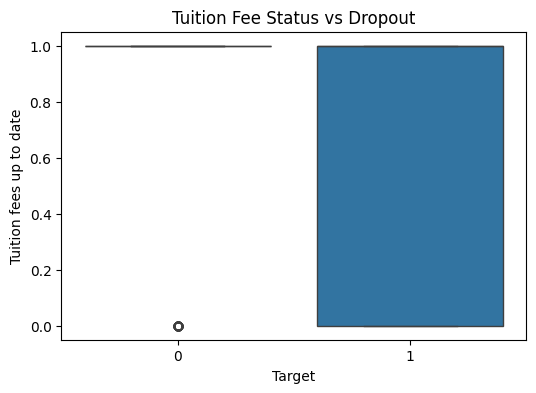

In [39]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Target", y="Tuition fees up to date", data=df)
plt.title("Tuition Fee Status vs Dropout")
plt.show()


### Observations

- Students with lower academic grades are more likely to drop out.
- Students who have not completed required units show higher dropout probability.
- Tuition fee payment status also appears to influence retention.

These insights align with institutional expectations and validate the dataset.


## 6. Train-Test Split

We separate the dataset into:

- Features (X)
- Target (y)

The dataset is split into:
- 80% Training data
- 20% Testing data

This allows us to train the model and evaluate its performance on unseen data.


In [40]:
X = df.drop("Target", axis=1)
y = df["Target"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (3539, 34)
Testing set size: (885, 34)


## 7. Model Training – Random Forest Classifier

Random Forest is an ensemble learning algorithm that builds multiple decision trees and combines their predictions.

It is chosen because:
- It handles numerical features effectively
- It reduces overfitting compared to a single decision tree
- It provides feature importance scores
- It performs well on structured/tabular data


In [42]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [43]:
y_pred = rf.predict(X_test)

## 8. Model Evaluation

We evaluate the model using:

- Accuracy
- Confusion Matrix
- Precision
- Recall
- F1-score


In [44]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.8610169491525423


### 8.1 Confusion Matrix

The confusion matrix shows:

- True Negatives (Correctly predicted non-dropouts)
- False Positives (Incorrectly predicted dropouts)
- False Negatives (Missed dropouts)
- True Positives (Correctly predicted dropouts)


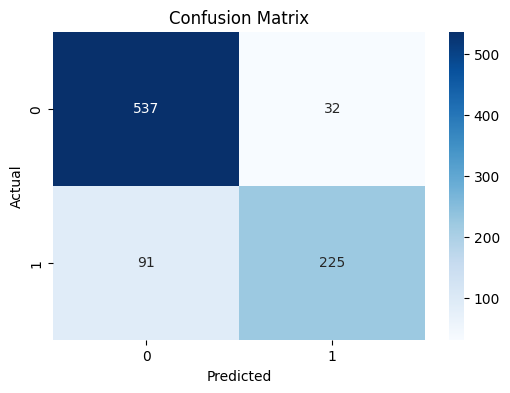

In [45]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### 8.2 Classification Report

The classification report provides:

- Precision
- Recall
- F1-score

These metrics help evaluate model performance more deeply than accuracy alone.


In [46]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.94      0.90       569
           1       0.88      0.71      0.79       316

    accuracy                           0.86       885
   macro avg       0.87      0.83      0.84       885
weighted avg       0.86      0.86      0.86       885



### 8.3 ROC Curve and AUC Score

The ROC curve evaluates the model's ability to distinguish between classes.

AUC (Area Under Curve) measures overall separability:
- AUC close to 1 → excellent model
- AUC close to 0.5 → poor model


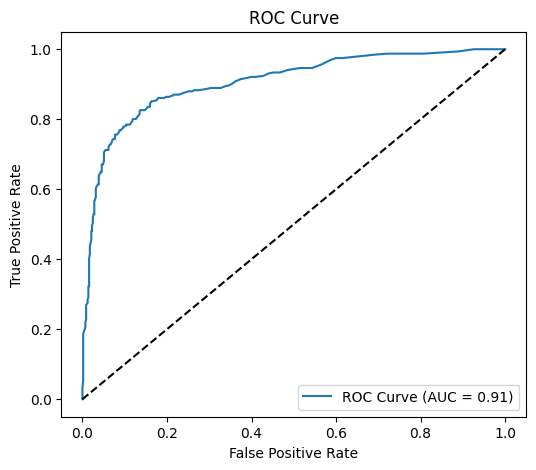

AUC Score: 0.9051912082044894


In [47]:
y_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label="ROC Curve (AUC = %0.2f)" % roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()
print("AUC Score:", roc_auc)


## 9. Feature Importance Analysis

Random Forest provides feature importance scores that indicate how much each feature contributes to the prediction.

Understanding feature importance helps identify key factors influencing student dropout.


In [48]:
importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)
importance_df.head(10)

,Feature,Importance
28,Curricular units 2nd sem (approved),0.154637
29,Curricular units 2nd sem (grade),0.126971
22,Curricular units 1st sem (approved),0.098179
23,Curricular units 1st sem (grade),0.070582
14,Tuition fees up to date,0.062721
17,Age at enrollment,0.047050
27,Curricular units 2nd sem (evaluations),0.041899
3,Course,0.034820
21,Curricular units 1st sem (evaluations),0.031456
10,Father's occupation,0.028626


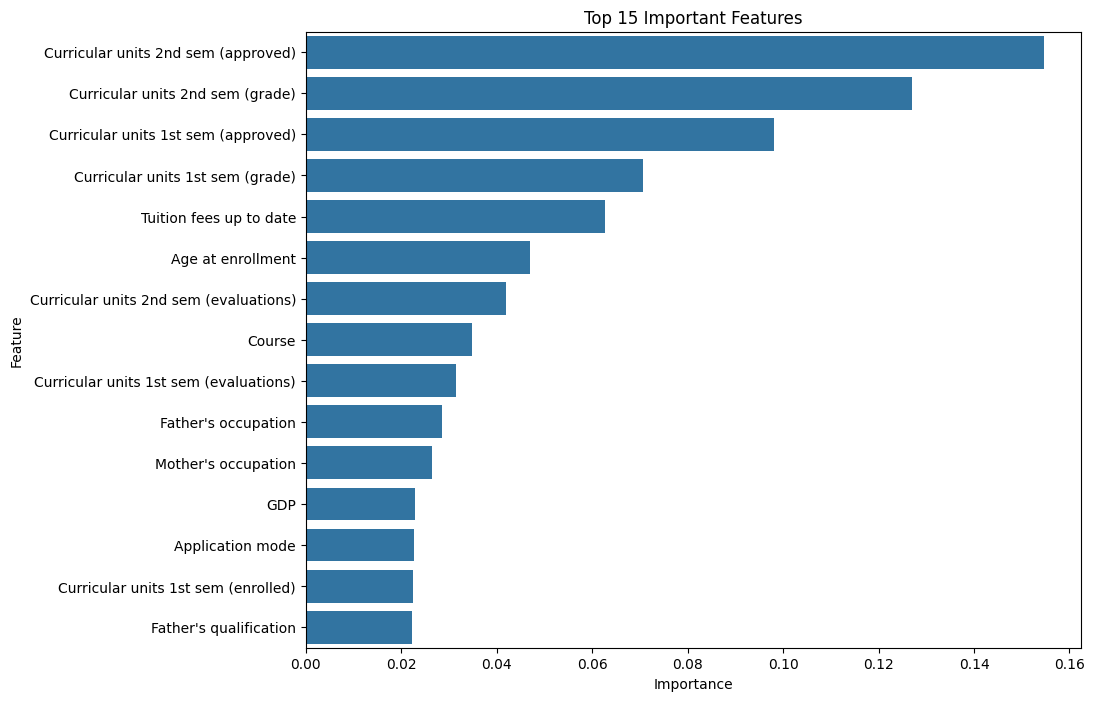

In [49]:
plt.figure(figsize=(10,8))
sns.barplot(x="Importance",y="Feature",data=importance_df.head(15))
plt.title("Top 15 Important Features")
plt.show()

### Observations

The most influential features include:

- Second semester approved units
- Academic grades
- Tuition fee status
- Age at enrollment

This indicates that academic performance and financial stability strongly influence student retention.


## 11. Cross-Validation

To ensure model stability and avoid overfitting, we perform 5-fold cross-validation.

This evaluates model performance across multiple splits of the dataset.


In [50]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf, X, y, cv=5)
print("Cross Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())

Cross Validation Scores: [0.87683616 0.8960452  0.86892655 0.87683616 0.85859729]
Average CV Score: 0.8754482705728966


## 12. Conclusion

The Random Forest model achieved:

- Accuracy: 86%
- AUC Score: 0.90
- Strong cross-validation performance

The model demonstrates strong predictive capability in identifying at-risk students.

Key findings:

- Academic performance is the strongest predictor of dropout.
- Financial factors also influence student retention.
- Early intervention strategies could significantly reduce dropout rates.

This machine learning approach can assist educational institutions in proactive student retention planning.
